#### Requirements: Investigate NYC Department of Buildings Dataset permits dataset, merge with other datasets and test hypotheses.

In [1]:
import pandas as pd
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
from dateutil import relativedelta
import numpy as np
import statsmodels.api as sm
from scipy import stats

##### Read the DOB Permit Issuance dataset

In [2]:
df = pd.read_csv("DOB_Permit_Issuance.csv")

c:\users\karan\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,8,9,10,15,25,31,33,34,35,36,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head() ### print first 5 rows of dataset

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,BRONX,2102476,200,E 135TH STREET,240249842,1,A2,Y,2319,120,...,PA,19355,6.10401e+09,03/27/2019 12:00:00 AM,3608996,40.810699,-73.931313,8.0,51.0,Mott Haven-Port Morris
1,MANHATTAN,1090833,249,WEST 14 STREET,140818435,1,A3,Y,764,10,...,NY,11101,7.18392e+09,03/27/2019 12:00:00 AM,3609359,40.739151,-74.001075,3.0,81.0,Hudson Yards-Chelsea-Flatiron-Union Square
2,MANHATTAN,1015903,20,WEST 36TH STREET,123372466,2,A2,Y,837,58,...,NY,10021,2.12249e+09,03/27/2019 12:00:00 AM,3609159,40.750090,-73.984513,4.0,84.0,Midtown-Midtown South
3,QUEENS,4467709,14-30,BROADWAY,421105618,1,A2,Y,529,2,...,NY,11101,7.18473e+09,03/27/2019 12:00:00 AM,3609358,40.765826,-73.932800,22.0,45.0,Astoria
4,QUEENS,4048873,42-06,108 STREET,421024689,1,A1,N,1986,37,...,NY,11368,7.18279e+09,03/27/2019 12:00:00 AM,3606599,40.749221,-73.858003,21.0,403.0,North Corona


In [4]:
df.columns ### Print columns in dataset

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Zip Code',
       'Bldg Type', 'Residential', 'Special District 1', 'Special District 2',
       'Work Type', 'Permit Status', 'Filing Status', 'Permit Type',
       'Permit Sequence #', 'Permit Subtype', 'Oil Gas', 'Site Fill',
       'Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date',
       'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's First Name', 'Owner's Last Name',
 

#### 1. EXPLORATORY DATA ANALYSIS

#### 1.1 Explore count of permits with respect to available columns such as borough, job type, permit type, etc

Text(0.5, 1.0, 'Count of no. of permits by Borough')

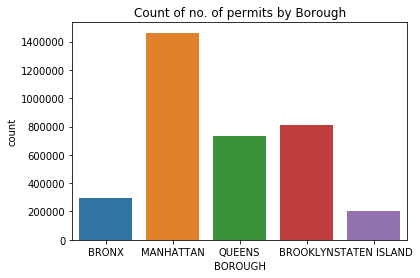

In [5]:
sns.countplot(x="BOROUGH",data=df).set_title("Count of no. of permits by Borough")

##### Manhattan has had the highest number of permits and Staten Island has had the least number of permits. 

In [6]:
print("Percentage missing in Borough column: "+str(df['BOROUGH'].isna().sum()/len(df['BOROUGH'])))

Percentage missing in Borough column: 0.0


Text(0.5, 1.0, 'Count of no. of permits by Building Type')

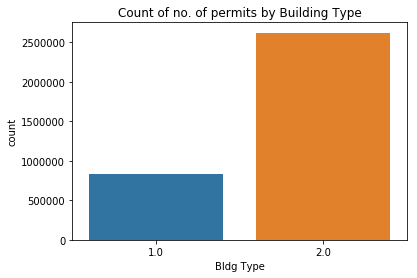

In [7]:
sns.countplot(x="Bldg Type",data=df).set_title("Count of no. of permits by Building Type")

##### Expected values of building type are:1 = 1-2-3 Family, 2 = Other. We can see that no. of permits for building type "Other" is greater than no. of permits for building type "Family".

In [8]:
print("Percentage missing in building type column: "+str(df['Bldg Type'].isna().sum()/len(df['Bldg Type'])))

Percentage missing in building type column: 0.015528259254117938


Text(0.5, 1.0, 'Count of no. of permits by Permit Status')

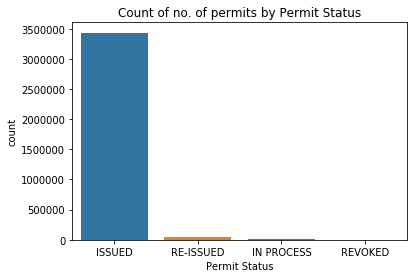

In [9]:
sns.countplot(x='Permit Status',data=df).set_title("Count of no. of permits by Permit Status")

##### We can see that most permits were issued, a small no. of permits were reissued, a small no. of permits are in process and a negligient no. of permits have been revoked.

In [10]:
print("Percentage missing in Permit Status column: "+str(df['Permit Status'].isna().sum()/len(df['Permit Status'])))

Percentage missing in Permit Status column: 0.0030821643503639567


Text(0.5, 1.0, 'Count of no. of permits by Filing Status')

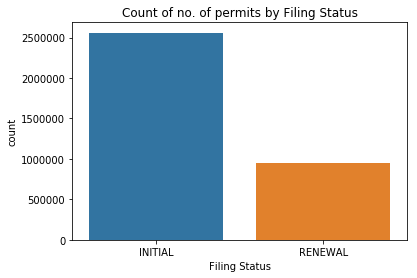

In [11]:
sns.countplot(x='Filing Status',data=df).set_title("Count of no. of permits by Filing Status")

##### We can see that the no. of permits with Filing Status Initial is more than no. of permits up for renewal. 

In [12]:
print("Percentage missing in Filing Status Column: "+str(df['Filing Status'].isna().sum()/len(df['Filing Status'])))

Percentage missing in Filing Status Column: 0.0


Text(0.5, 1.0, 'Count of no. of permits by Permit Type')

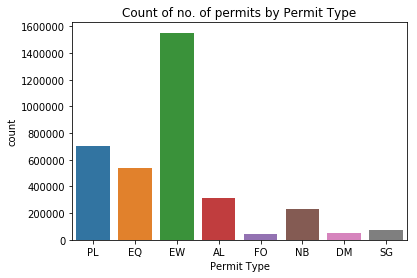

In [13]:
sns.countplot(x='Permit Type',data=df).set_title("Count of no. of permits by Permit Type")

##### The expected values are PL: Plumbing, EQ: Contruction equipment, EW: Equipment Work, AL: Alteration, FO: Foundation, NB: New Building, DM: Demolition, SG: Sign. We can see that most permits have type Equipment work.  The least no. of permits have type Foundation. Even permits with type Demolition is low. 

In [14]:
print("Percentage missing in Permit Type column: "+str(df['Permit Type'].isna().sum()/len(df['Permit Type'])))

Percentage missing in Permit Type column: 2.850424813062015e-07


Text(0.5, 1.0, 'Count of no. of permits by Permit Subtype')

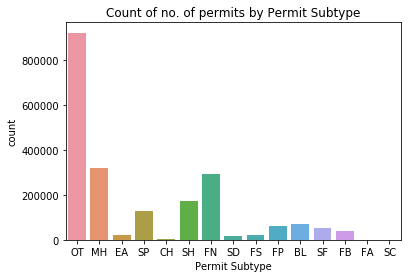

In [15]:
sns.countplot(x='Permit Subtype',data=df).set_title("Count of no. of permits by Permit Subtype")

##### The expected values are BL: Boiler, CC:Curb Cut, CH:Chute, DM:Demolition and Removal, EQ:Construction Equipment, EW:Equipment Work, FA:Fire Alarm, FB:Fuel Burning, FN:Fence, FP:Fire Suppression, FS:Fuel Storage, MH:Mechanical/HVAC, OT:Other, PL:Plumbing, SD:Standpipe, SF:Scaffold, SG:Sign, SP:Sprinkler. We can see that most permits are of subtype Other followed by Mechanical and Fence

In [16]:
print("Percentage missing in Permit Subtype column: "+str(df['Permit Subtype'].isna().sum()/len(df['Permit Subtype'])))

Percentage missing in Permit Subtype column: 0.3971813289193555


##### Almost 40 percent values are missing in this column.

Text(0.5, 1.0, 'Count of no. of permits by Work Type')

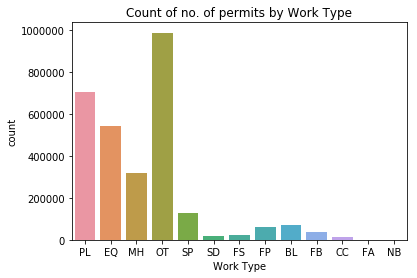

In [17]:
sns.countplot(x='Work Type',data=df).set_title("Count of no. of permits by Work Type")

##### The expected values are BL: Boiler, CC:Curb Cut, CH:Chute, DM:Demolition and Removal, EQ:Construction Equipment, EW:Equipment Work, FA:Fire Alarm, FB:Fuel Burning, FN:Fence, FP:Fire Suppression, FS:Fuel Storage, MH:Mechanical/HVAC, OT:Other, PL:Plumbing, SD:Standpipe, SF:Scaffold, SG:Sign, SP:Sprinkler. We can see that most permits are of work type Other followed by Plumbing.

In [18]:
print("Percantage missing in column Work Type: "+str(df['Work Type'].isna().sum()/len(df['Work Type'])))

Percantage missing in column Work Type: 0.17379524657457324


Text(0.5, 1.0, 'Count of no. of permits by Job Type')

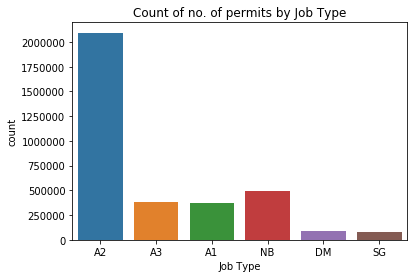

In [19]:
sns.countplot(x='Job Type',data=df).set_title("Count of no. of permits by Job Type")

##### The expected values are : Expected values are:A1 = Alteration Type I, A major alteration that will change the use, egress, or occupancy of the building. A2 = Alteration Type II, An application with multiple types of work that do not affect the use, egress, or occupancy of the building. A3 = Alteration Type III, One type of minor work that doesn't affect the use, egress, or occupancy of the building. NB = New Building, An application to build a new structure. “NB” cannot be selected if any existing building elements are to remain—for example a part of an old foundation, a portion of a façade that will be incorporated into the construction, etc. DM = Demolition, An application to fully or partially demolish an existing building. SG = Sign, An application to install or remove an outdoor sign. We can see that most no. of permits have job type A2 which is alteration type 2. Very few permits have job type demolition and sign. A1, NB and DM job types are associated with major construction activity. A2, A3 and Sign are associated with minor construction activity.

In [20]:
print("Percentage missing in Job Type column: "+str(df['Job Type'].isna().sum()/len(df['Job Type'])))

Percentage missing in Job Type column: 0.0


Text(0.5, 1.0, 'Count of no. of permits by Residential')

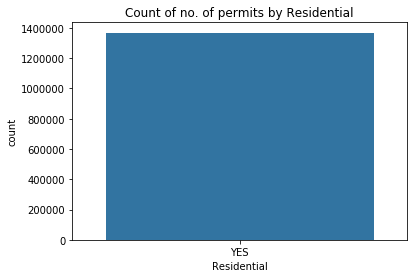

In [21]:
sns.countplot(x='Residential',data=df).set_title("Count of no. of permits by Residential")

##### The expected value is Yes or missing. We know that almost 40 percent of the buildings for which permit was issued were residential but the data is missing for the other 60 percent of buildings ie. they can be residential or non-residential. 

In [22]:
print("Percent missing for Residential column: "+str(df['Residential'].isna().sum()/len(df['Residential'])))

Percent missing for Residential column: 0.6098743276204169


Text(0.5, 1.0, 'Count of no. of permits by Oil /Gas')

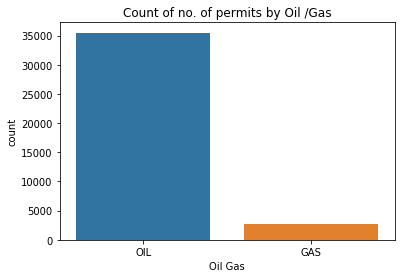

In [23]:
sns.countplot(x='Oil Gas',data=df).set_title("Count of no. of permits by Oil /Gas")

##### This column only has a value if fuel burning equipment was used in the work. We can see that most of the fuel burning equipment ran on oil as compared to gas. 

In [24]:
print("Percentage missing for Oil Gas column: "+str(df['Oil Gas'].isna().sum()/len(df['Oil Gas'])))

Percentage missing for Oil Gas column: 0.9891270545505749


##### Almost 99 percent values are missing either because fuel burning equipment was not used or because the value is not known.

Text(0.5, 1.0, 'Count of no. of permits by Non-Profit Indicator')

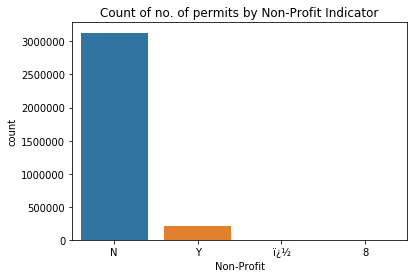

In [25]:
sns.countplot(x='Non-Profit',data=df).set_title("Count of no. of permits by Non-Profit Indicator")

##### This column indicates whether the building is owned by a non-profit. We can see that most buildings are not owned by non-profits.  We also observe that there are some entry errors for this column in a few cases. 

In [26]:
print("Percentage missing in Non Profit column: "+str(df['Non-Profit'].isna().sum()/len(df['Non-Profit'])))

Percentage missing in Non Profit column: 0.04574903320716403


#### 1.2 Use Filing Date, Issue Date, Expiration Date to calculate months to issue and months to expiry for each permit, calculate summary statistics and test hypotheses.

##### Extract year from Filing Date column and create a Filing Date Year column

In [27]:
def getYear(row):
    if isinstance(row,str):
        return int(row[6:10])
    else:
        return row

In [28]:
df['Filing Date Year']=df.apply(lambda row: getYear(row['Filing Date']),axis=1)

##### Extract month from Filing Date column and create a Filing Date Month column

In [29]:
def getMonth(row):
    if isinstance(row,str):
        return int(row[0:2])
    else:
        return row

In [30]:
df['Filing Date Month']=df.apply(lambda row: getMonth(row['Filing Date']),axis=1)

##### Create groupby object that groups by Filing Date Year and Filing Date Month and calculates count of permits and name dataframe returned as df_FilingDate

In [31]:
df_FilingDate = pd.DataFrame(df.groupby(['Filing Date Year','Filing Date Month']).count()['Permit Status']).reset_index()

##### Take Filing Date Year and Month column and create a new Date column that has day as 01, month as Filing Date Month and year as Filing Month. This is done to plot count of permits by month and year. 

In [32]:
def getDate(year, month):
    return datetime.datetime.strptime(str(int(year))+"-"+str(int(month)), "%Y-%m")

In [33]:
df_FilingDate['Date'] = df_FilingDate.apply(lambda row: getDate(row['Filing Date Year'],row['Filing Date Month']),axis=1)

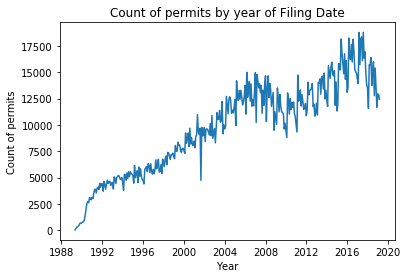

In [34]:
plt.title("Count of permits by year of Filing Date")
plt.xlabel("Year")
plt.ylabel("Count of permits")
plt.plot(df_FilingDate["Date"],df_FilingDate["Permit Status"])

##### We can see an upward trend in number of permits filed. We see a slight dip in no. of permits from 2008 to 2012. The dip after 2018 is because we only have 3 months of data for year 2019. 

##### Repeat procedure used above to plot count of permits by Issuance Date

In [35]:
df['Issuance Date Year']=df.apply(lambda row: getYear(row['Issuance Date']),axis=1)

In [36]:
df['Issuance Date Month']=df.apply(lambda row: getMonth(row['Issuance Date']),axis=1)

In [37]:
df_IssuanceDate = pd.DataFrame(df.groupby(['Issuance Date Year','Issuance Date Month']).count()['Permit Status']).reset_index()

In [38]:
df_IssuanceDate['Date'] = df_IssuanceDate.apply(lambda row: getDate(row['Issuance Date Year'],row['Issuance Date Month']),axis=1)

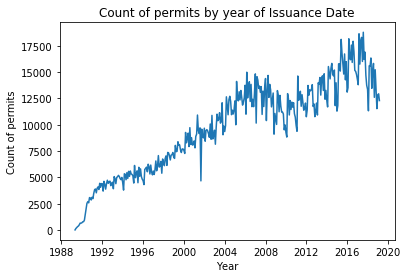

In [39]:
plt.title("Count of permits by year of Issuance Date")
plt.xlabel("Year")
plt.ylabel("Count of permits")
plt.plot(df_IssuanceDate["Date"],df_IssuanceDate["Permit Status"])

##### The curve for Issuance date mirrors the curve for Filling date. It has the same upward trend and same dips. This is because most permits that were filed were issued almost immediately.

##### Create function for finding difference in months between two dates. We observe that the Issuance data for some cases is earlier than Filing Date, probably an entry error. Thus we disregard those entries when calculating months between filing and issuance.  Same for issuance and expiry. 

In [40]:
def getDiff(date1,date2):
    if isinstance(date1,str) and isinstance(date2,str):
        date1 = datetime.datetime.strptime(date1[0:10],"%m/%d/%Y")
        date2 = datetime.datetime.strptime(date2[0:10],"%m/%d/%Y")
        if relativedelta.relativedelta(date2, date1).months>=0:
            return relativedelta.relativedelta(date2, date1).months
        else:
            return np.nan
    else:
        return np.nan
    

##### Create column for months between Filing Date and Issuance Date

In [41]:
df['Months To Issue']=df.apply(lambda row: getDiff(row['Filing Date'],row['Issuance Date']),axis=1)

##### Create column for months between Issuance Date and Expiration Date

In [42]:
df['Months To Expire']=df.apply(lambda row: getDiff(row['Issuance Date'],row['Expiration Date']),axis=1)

Text(0.5, 1.0, 'Univariate Distribution of Months to Expire')

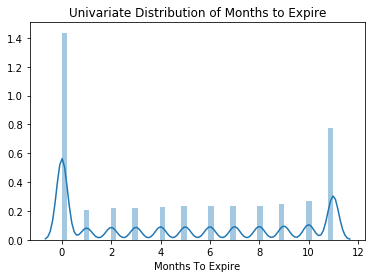

In [43]:
sns.distplot(df[~df['Months To Expire'].isna()]['Months To Expire']).set_title("Univariate Distribution of Months to Expire")

##### We can see that the months to expire of permit ranges from 0 to 11. Most permits have value 0 for months to expire followed by 11. 

Text(0.5, 1.0, 'Univariate Distribution of Months to Issue')

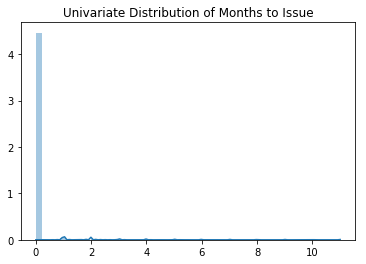

In [44]:
sns.distplot(df[~df['Months To Issue'].isna()]['Months To Issue'].tolist()).set_title("Univariate Distribution of Months to Issue")

##### We can see that the months to issue of permit ranges from 0 to 11. Almost all permits have value 0 for months to issue. This means almost all permits are issued in the same month as they are filed. 

##### Summary statistics for months to issue

In [45]:
df['Months To Issue'].describe()

count    3.488195e+06
mean     4.973718e-02
std      4.994175e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.100000e+01
Name: Months To Issue, dtype: float64

##### Summary statistics for months to expire

In [46]:
df['Months To Expire'].describe()

count    3.488240e+06
mean     4.786099e+00
std      4.299800e+00
min      0.000000e+00
25%      0.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      1.100000e+01
Name: Months To Expire, dtype: float64

##### We observe that months to issue is 0 in maximum cases. We conduct a one sample test with null hypothesis as mean of months to issue permit is 0. 

In [47]:
df_notna = df[~df['Months To Issue'].isna()]['Months To Issue'].tolist()
stats.ttest_1samp(df_notna,0.0)

Ttest_1sampResult(statistic=186.00207490733112, pvalue=0.0)

##### We get p-value=0. Thus the null hypothesis is rejected. The mean of months to issue is not zero.

##### Is there a difference in average time to issue permit by Job Type. Maybe the average time to issue permit is more for work that requires major alterations(A1,NM,DM) as compared to minor alterations??

In [48]:
df.groupby(['Job Type'])['Months To Issue'].mean()

Job Type
A1    0.076731
A2    0.047034
A3    0.030892
DM    0.033990
NB    0.058108
SG    0.052216
Name: Months To Issue, dtype: float64

##### The average time to issue permit  is almost the same for all work types. 

In [49]:
df.groupby(['Job Type'])['Months To Expire'].mean()

Job Type
A1    4.705665
A2    4.738120
A3    4.929439
DM    5.218445
NB    4.869704
SG    4.721766
Name: Months To Expire, dtype: float64

##### Similary the average time for permit to expire is also almost the same for all work types

##### We conduct a two sample t-test to check if the average months to issue is same for major and minor construction work.

In [50]:
df_notna = df[~df['Months To Issue'].isna()]
df_minorwork = df_notna[df_notna["Job Type"].isin(["A2","A3","SG"])]['Months To Issue'].tolist()
df_majorwork = df_notna[df_notna["Job Type"].isin(["A1","NB","DM"])]['Months To Issue'].tolist()
stats.ttest_ind(df_minorwork,df_majorwork,equal_var=False)

Ttest_indResult(statistic=-27.66427459599139, pvalue=2.0822000484355399e-168)

##### We get p vlaue < 0.05. Thus the null hypothesis is rejected. The average months to issue is not the same for major and minor construction activity

##### Is there a difference in average time to issue permit by borough and Job Type? Maybe the time to issue the permit might be higher or lower in a particular borough. 

In [51]:
df.groupby(['BOROUGH','Job Type'])['Months To Issue'].mean()

BOROUGH        Job Type
BRONX          A1          0.106894
               A2          0.065992
               A3          0.039058
               DM          0.041177
               NB          0.065468
               SG          0.071061
BROOKLYN       A1          0.078710
               A2          0.053536
               A3          0.034735
               DM          0.036624
               NB          0.060156
               SG          0.051321
MANHATTAN      A1          0.093414
               A2          0.040335
               A3          0.022553
               DM          0.027062
               NB          0.057977
               SG          0.048114
QUEENS         A1          0.065960
               A2          0.055407
               A3          0.044321
               DM          0.042350
               NB          0.059991
               SG          0.057570
STATEN ISLAND  A1          0.035772
               A2          0.033976
               A3          0.030923
    

##### We observe no outliers or unusual cases. The average time to issue the permit remains the same across boroughs and job types. 

In [52]:
df.groupby(['BOROUGH','Job Type'])['Months To Expire'].mean()

BOROUGH        Job Type
BRONX          A1          4.719675
               A2          4.698106
               A3          4.991783
               DM          5.273267
               NB          4.892591
               SG          4.678468
BROOKLYN       A1          4.730077
               A2          4.675122
               A3          4.912654
               DM          5.219267
               NB          4.875840
               SG          4.784631
MANHATTAN      A1          4.929739
               A2          4.823023
               A3          4.934889
               DM          5.321868
               NB          4.541606
               SG          4.598313
QUEENS         A1          4.565818
               A2          4.591744
               A3          4.891037
               DM          5.204359
               NB          4.757708
               SG          4.847420
STATEN ISLAND  A1          4.567904
               A2          4.497344
               A3          5.001778
    

##### Similarly the average time for permit to expire also remains the same across boroughs and job types

#### 1.3 Let's take a closer look at cases where Permit was revoked.

In [53]:
df[df['Permit Status']=="REVOKED"][["BOROUGH","Street Name","Job Type","Work Type","Filing Date Year","Owner's Business Name","Permittee's Business Name"]]

,BOROUGH,Street Name,Job Type,Work Type,Filing Date Year,Owner's Business Name,Permittee's Business Name
1103639,MANHATTAN,BOWERY,SG,NaN,2013.0,"CPNY, LLC","CITY ELECT, SIGN ERECTORS"
2615680,QUEENS,MAURICE AVENUE,NB,NaN,2002.0,NaN,NaN
2652101,QUEENS,13 STREET,A2,OT,2002.0,Bleeker Pastry,BLEEKER PASTRY
2652365,QUEENS,13 STREET,A2,MH,2002.0,Bleeker Pastry,BLEEKER PASTRY


##### There are only four such cases. Out of four two cases involved the same building in Queens. The permit was rejected for minor alterations in the year 2002. Permit for a new building was also rejected in Queens in the year 2002.

#### 1.4 We will only focus on areas with major development activity now. What are some good areas to invest in real estate? A good indicator of this question is areas with major development activity

##### Do the boroughs with more permits issued change if we focus on major development activity only ie. job type- NB, A1

Text(0.5, 1.0, 'No. of permits by Borough')

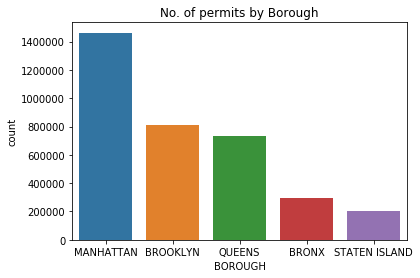

In [54]:
sns.countplot(x="BOROUGH",data=df,order = df['BOROUGH'].value_counts().index).set_title("No. of permits by Borough")

In [55]:
df_new_buildings = df[df['Job Type'].isin(["NB","A1"])]

Text(0.5, 1.0, 'No. of permits for major development by Borough')

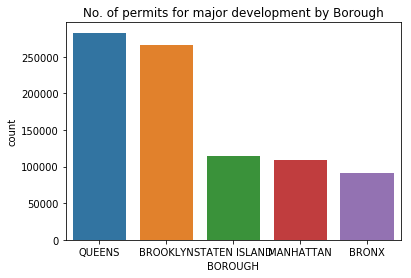

In [56]:
sns.countplot(x="BOROUGH",data=df_new_buildings,order = df_new_buildings['BOROUGH'].value_counts().index).set_title("No. of permits for major development by Borough")

##### The order of the boroughs does change if we focos on major development activity. Manhattan has the highest no. of overall permits but is fourth in no. of permits for major devlopment. Queens has the highest no. of permits issued for major development work. 

##### We can say that neighborhoods with major development work are the premium areas. Let's take a look at premium areas by decade at borough, neighborhood and zip code level.

##### Years-1980-2000

In [57]:
year_list= [1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000]

##### Boroughs with major development work

In [58]:
group_borough = df_new_buildings[df_new_buildings['Filing Date Year'].isin(year_list)].groupby(['BOROUGH'],as_index=False)["Permit Status"].count().sort_values("Permit Status", ascending=False)
top2 = group_borough['BOROUGH'][:2].tolist()
top2

['QUEENS', 'BROOKLYN']

##### Neighborhoods with major development work

In [59]:
group_nta = df_new_buildings[df_new_buildings['Filing Date Year'].isin(year_list)].groupby(['NTA_NAME'],as_index=False)["Permit Status"].count().sort_values("Permit Status", ascending=False)
top10 = group_nta['NTA_NAME'][:10].tolist()
top10

['Charleston-Richmond Valley-Tottenville',
 'Arden Heights',
 'Stuyvesant Heights',
 "Annadale-Huguenot-Prince's Bay-Eltingville",
 'Borough Park',
 'Rossville-Woodrow',
 'Great Kills',
 'Bedford',
 'New Springville-Bloomfield-Travis',
 'Upper West Side']

##### Zip Codes with major development work

In [60]:
group_zip = df_new_buildings[df_new_buildings['Filing Date Year'].isin(year_list)].groupby(['Zip Code'],as_index=False)["Permit Status"].count().sort_values("Permit Status", ascending=False)
top10 = group_zip['Zip Code'][:10].tolist()
top10

[10312.0,
 10309.0,
 10314.0,
 10305.0,
 10306.0,
 11221.0,
 10307.0,
 11233.0,
 10459.0,
 11207.0]

##### Did the premium areas change in the next decade?

##### Years: 2000-2010

In [61]:
year_list= [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]

##### Boroughs with major development work

In [62]:
group_borough = df_new_buildings[df_new_buildings['Filing Date Year'].isin(year_list)].groupby(['BOROUGH'],as_index=False)["Permit Status"].count().sort_values("Permit Status", ascending=False)
top2 = group_borough['BOROUGH'][:2].tolist()
top2

['QUEENS', 'BROOKLYN']

##### The boroughs did not change

##### Neighborhoods with major development activity

In [63]:
group_nta = df_new_buildings[df_new_buildings['Filing Date Year'].isin(year_list)].groupby(['NTA_NAME'],as_index=False)["Permit Status"].count().sort_values("Permit Status", ascending=False)
top10 = group_nta['NTA_NAME'][:10].tolist()
top10

['East New York',
 'Bedford',
 'Hammels-Arverne-Edgemere',
 'Borough Park',
 'Charleston-Richmond Valley-Tottenville',
 'Bushwick South',
 'Crown Heights North',
 'South Ozone Park',
 'Far Rockaway-Bayswater',
 'South Jamaica']

##### The neighborhoods changed. Some new upcoming neighborhoods in this decade were East New York, Bedford, Bushwick South. Charleston-Richmond Valley-Tottenville, Bedford, Borough Park continued to have major development from the last decade.

##### Zip codes with major development activity

In [64]:
group_zip = df_new_buildings[df_new_buildings['Filing Date Year'].isin(year_list)].groupby(['Zip Code'],as_index=False)["Permit Status"].count().sort_values("Permit Status", ascending=False)
top10 = group_zip['Zip Code'][:10].tolist()
top10

[10309.0,
 11368.0,
 11207.0,
 10306.0,
 10312.0,
 11691.0,
 11206.0,
 11208.0,
 11233.0,
 11221.0]

##### Some premium zip codes remained the same- 10309,10312 and some changed-11691

##### Did the premium neighborhoods change in the next decade?

##### Years- 2011 to 2018

In [65]:
year_list= [2011,2012,2013,2014,2015,2016,2017,2018]

##### Boroughs with major development work

In [66]:
group_borough = df_new_buildings[df_new_buildings['Filing Date Year'].isin(year_list)].groupby(['BOROUGH'],as_index=False)["Permit Status"].count().sort_values("Permit Status", ascending=False)
top2 = group_borough['BOROUGH'][:2].tolist()
top2

['BROOKLYN', 'QUEENS']

##### The top boroughs did not change but their order changed. Brooklyn overtook Queens in major development activity

##### Neighborhoods with major development work

In [67]:
group_nta = df_new_buildings[df_new_buildings['Filing Date Year'].isin(year_list)].groupby(['NTA_NAME'],as_index=False)["Permit Status"].count().sort_values("Permit Status", ascending=False)
top10 = group_nta['NTA_NAME'][:10].tolist()
top10

['Borough Park',
 'Breezy Point-Belle Harbor-Rockaway Park-Broad Channel',
 'Bedford',
 'North Side-South Side',
 'Bushwick South',
 'Crown Heights North',
 'SoHo-TriBeCa-Civic Center-Little Italy',
 'Park Slope-Gowanus',
 'Carroll Gardens-Columbia Street-Red Hook',
 'Hudson Yards-Chelsea-Flatiron-Union Square']

##### Some new upcoming neighborhoods in this decade were: 'Breezy Point-Belle Harbor-Rockaway Park-Broad Channel' and 'North Side-South Side'. Borough park and bedford have shown major development activity in the last three decades consistently.

##### Zips with major development work

In [68]:
group_zip = df_new_buildings[df_new_buildings['Filing Date Year'].isin(year_list)].groupby(['Zip Code'],as_index=False)["Permit Status"].count().sort_values("Permit Status", ascending=False)
top10 = group_zip['Zip Code'][:10].tolist()
top10

[11221.0,
 11211.0,
 11219.0,
 11206.0,
 11238.0,
 11355.0,
 11357.0,
 11101.0,
 11220.0,
 10306.0]

##### Some upcoming zip codes in this decade are 11221,11211,11219.

#####  What are the top 10 neighborhoods with major development work in the last year?

In [69]:
year_list= [2018,2019]

##### Current top 10 upcoming neighborhoods with major development activity

In [70]:
group_nta = df_new_buildings[df_new_buildings['Filing Date Year'].isin(year_list)].groupby(['NTA_NAME'],as_index=False)["Permit Status"].count().sort_values("Permit Status", ascending=False)
top10 = group_nta['NTA_NAME'][:10].tolist()
top10

['Borough Park',
 'Bedford',
 'Bushwick South',
 'Crown Heights North',
 'North Side-South Side',
 'Park Slope-Gowanus',
 'SoHo-TriBeCa-Civic Center-Little Italy',
 'Stuyvesant Heights',
 'Breezy Point-Belle Harbor-Rockaway Park-Broad Channel',
 'Hudson Yards-Chelsea-Flatiron-Union Square']

#### 1.5 Which site safety company should you use? We can use historical data to see what safety companies have been used by the decade.

##### Top 10 site safety companies for 1989 to 1999

In [71]:
year_list= [1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999]

In [72]:
group_firesafety = df[df['Filing Date Year'].isin(year_list)].groupby(['Site Safety Mgr Business Name'],as_index=False)["Permit Status"].count().sort_values("Permit Status", ascending=False)
top10 = group_firesafety['Site Safety Mgr Business Name'][:10].tolist()
top10

['SAME',
 'LEHRER MCGOVERN BOVIS INC',
 'HRH CONSTRUCTION',
 'INSPECO INC',
 'BOYNTON PLACE CONTRACTING CORP.',
 'SCALA CONTRACTING',
 'HRH CONSTRUCTION CORP.',
 'SCALA CONTRACTING CO., INC.',
 'S.F/PLM & HTNG',
 'BLUEPRINT PLUMBING CORP.']

#### Top 10 site safety companies for 2000 to 2010

In [73]:
year_list= [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]

In [74]:
group_firesafety = df[df['Filing Date Year'].isin(year_list)].groupby(['Site Safety Mgr Business Name'],as_index=False)["Permit Status"].count().sort_values("Permit Status", ascending=False)
top10 = group_firesafety['Site Safety Mgr Business Name'][:10].tolist()
top10

['BOVIS LEND LEASE',
 'TOTAL SAFETY CONSULTING',
 'SITE SAFETY LLC',
 'NYC DEPT. OF BUILDINGS',
 'SITE SAFETY, LLC',
 'HOMELAND SAFETY CONSULTAN',
 'PRO SAFETY SERVICES LLC',
 'BOVIS LEND LEASE LMB INC',
 'BOVIS LENDLEASE',
 'HRH CONSTRUCTION LLC']

#### The top site safety companies totally changed in this decade.

#### Top 10 site safety companies for 2011 to 2019

In [75]:
year_list= [2011,2012,2013,2014,2015,2016,2017,2018,2019]

In [76]:
group_firesafety = df[df['Filing Date Year'].isin(year_list)].groupby(['Site Safety Mgr Business Name'],as_index=False)["Permit Status"].count().sort_values("Permit Status", ascending=False)
top10 = group_firesafety['Site Safety Mgr Business Name'][:10].tolist()
top10

['NYC DEPT. OF BUILDINGS',
 'TOTAL SAFETY CONSULTING',
 'SITE SAFETY LLC',
 'SITE SAFETY, LLC',
 'MENOTTI ENTERPRISE LLC',
 'PRO SAFETY SERVICES LLC',
 'CR SAFETY',
 'CITY SAFETY COMPLIANCE',
 'RD2 SITE SAFETY SERVICES',
 'LEND LEASE']

#### Coampanies like NYC DOB, Total Safety Consulting, Site Safety LLC continue to do well from the last decade

#### 2. STATISTICAL TESTING

#### Let's narrow our focus to whether the no. of permits can be used as a predictor. Here correlation does not imply causation.

#### 2.1 Hypothesis 1) Is there a linear relationship between no. of permits and population

##### Create dataframe of count of permits at neighborhood level for year 2010

In [77]:
df_nta_work = pd.DataFrame(df[df['Filing Date Year'] == 2010].groupby(['NTA_NAME']).count()["Permit Status"])
df_nta_work.head()

,Permit Status
NTA_NAME,
Airport,16
Allerton-Pelham Gardens,167
Annadale-Huguenot-Prince's Bay-Eltingville,424
Arden Heights,256
Astoria,1260


##### Create dataframe of population at neighborhood level. We have the population for years-2000,2010

In [78]:
df_nta_demograph = pd.read_csv("Census_Demographics_at_the_Neighborhood_Tabulation_Area__NTA__level.csv")

In [79]:
df_nta_demograph.head(5)

,Geographic Area - Borough,Geographic Area - 2010 Census FIPS County Code,Geographic Area - Neighborhood Tabulation Area (NTA)* Code,Geographic Area - Neighborhood Tabulation Area (NTA)* Name,Total Population 2000 Number,Total Population 2010 Number,Total Population Change 2000-2010 Number,Total Population Change 2000-2010 Percent
0,Bronx,5.0,BX01,Claremont-Bathgate,28149.0,31078.0,2929.0,10.4
1,Bronx,5.0,BX03,Eastchester-Edenwald-Baychester,35422.0,34517.0,-905.0,-2.6
2,Bronx,5.0,BX05,Bedford Park-Fordham North,55329.0,54415.0,-914.0,-1.7
3,Bronx,5.0,BX06,Belmont,25967.0,27378.0,1411.0,5.4
4,Bronx,5.0,BX07,Bronxdale,34309.0,35538.0,1229.0,3.6


##### Merge the two dataframes- count of permits and population at neighborhood level

In [80]:
df_nta_merge = df_nta_work.join(df_nta_demograph.set_index('Geographic Area - Neighborhood Tabulation Area (NTA)* Name'), how="left")

In [81]:
df_nta_merge.head(5)

,Permit Status,Geographic Area - Borough,Geographic Area - 2010 Census FIPS County Code,Geographic Area - Neighborhood Tabulation Area (NTA)* Code,Total Population 2000 Number,Total Population 2010 Number,Total Population Change 2000-2010 Number,Total Population Change 2000-2010 Percent
Airport,16,Queens,81.0,QN98,0.0,0.0,0.0,NaN
Allerton-Pelham Gardens,167,Bronx,5.0,BX31,28510.0,28903.0,393.0,1.4
Annadale-Huguenot-Prince's Bay-Eltingville,424,Staten Island,85.0,SI01,26376.0,27770.0,1394.0,5.3
Arden Heights,256,Staten Island,85.0,SI48,24996.0,25238.0,242.0,1.0
Astoria,1260,Queens,81.0,QN70,89122.0,78793.0,-10329.0,-11.6


In [82]:
df_nta_merge = df_nta_merge.dropna()

<function matplotlib.pyplot.show(*args, **kw)>

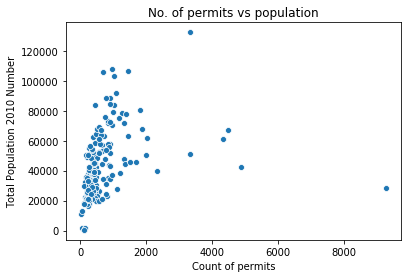

In [83]:
ax=sns.scatterplot(x="Permit Status",y="Total Population 2010 Number",data=df_nta_merge)
ax.set(xlabel='Count of permits',title="No. of permits vs population")
plt.show

##### We observe a linear relationship. We need to check if the linear relationship is statistically significant.

In [84]:
X = sm.add_constant(df_nta_merge['Permit Status'])
y = df_nta_merge['Total Population 2010 Number']

##### Create a linear model with predictor as count of no. of permits and predicted value as Total Population

In [85]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Total Population 2010 Number   R-squared:                       0.097
Model:                                      OLS   Adj. R-squared:                  0.092
Method:                           Least Squares   F-statistic:                     19.90
Date:                          Tue, 02 Apr 2019   Prob (F-statistic):           1.41e-05
Time:                                  14:47:26   Log-Likelihood:                -2126.2
No. Observations:                           187   AIC:                             4256.
Df Residuals:                               185   BIC:                             4263.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

##### Null hypothesis is coefficient of count of permits is zero. We get p-value= 0. Thus we can reject the null hypothesis at 0.05 level of significance. 

##### Create dataframe of count of permits at neighborhood level for year 2000

In [86]:
df_nta_work2 = pd.DataFrame(df[df['Filing Date Year'] == 2000].groupby(['NTA_NAME']).count()["Permit Status"])
df_nta_work2.head()

,Permit Status
NTA_NAME,
Allerton-Pelham Gardens,184
Annadale-Huguenot-Prince's Bay-Eltingville,768
Arden Heights,581
Astoria,649
Auburndale,205


##### Merge the two dataframes- count of permits and population at neighborhood level

In [87]:
df_nta_merge2 = df_nta_work2.join(df_nta_demograph.set_index('Geographic Area - Neighborhood Tabulation Area (NTA)* Name'), how="left")

In [88]:
df_nta_merge2 = df_nta_merge2.dropna()

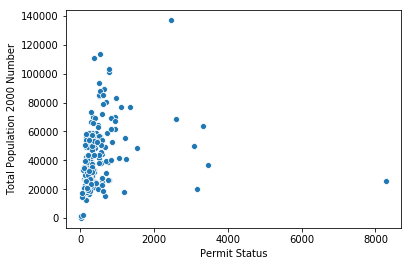

In [89]:
ax=sns.scatterplot(x="Permit Status",y="Total Population 2000 Number",data=df_nta_merge2)


##### We observe a linear relationship. We need to check if it is statistically significant.

In [90]:
X = sm.add_constant(df_nta_merge2['Permit Status'])
y = df_nta_merge2['Total Population 2000 Number']

##### Create a linear model with predictor as count of no. of permits and predicted value as Total Population

In [91]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Total Population 2000 Number   R-squared:                       0.038
Model:                                      OLS   Adj. R-squared:                  0.033
Method:                           Least Squares   F-statistic:                     7.319
Date:                          Tue, 02 Apr 2019   Prob (F-statistic):            0.00746
Time:                                  14:48:08   Log-Likelihood:                -2135.3
No. Observations:                           187   AIC:                             4275.
Df Residuals:                               185   BIC:                             4281.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

##### Null hypothesis is coefficient of count of permits is zero. We get p-value= 0.007. Thus we can reject the null hypothesis at 0.05 level of significance. 

##### There is a linear relationship between no. of permits and population.

##### 2.1 Hypothesis 2: Is there a linear relationship between no. of coffee shops, healthy food restaurants and no. of permits???

##### Read NYC restaurant data

In [92]:
df_restaurant=pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")

##### Only keep data for coffee shops and healthy food restaurants. These two kinds of cuisines have often been used as a proxy for gentrification- an indicator for influx of more affluent residents.

In [93]:
df_restaurant2 = df_restaurant[df_restaurant['CUISINE DESCRIPTION'].isin(['Bagels/Pretzels','CafÃ©/Coffee/Tea','Donuts','Salads','Juice, Smoothies, Fruit Salads','Vegetarian'])]

##### Create GRADE DATE YEAR column from GRADE DATE column

In [94]:
df_restaurant2["GRADE DATE YEAR"] = df_restaurant2.apply(lambda row: getYear(row['GRADE DATE']),axis=1)

c:\users\karan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### Group restaurants by zipcode

In [95]:
df_restaurant3 = pd.DataFrame(df_restaurant2.groupby(["ZIPCODE"]).count()["GRADE"]).reset_index()

##### Group permits  by Zipcode

##### Note: NYC Restaurant Data is only available from 2014 to 2019. Thus we filter our permits dataset to include only these years

In [96]:
df_select_years = df[df["Filing Date Year"].isin([2014,2015,2016,2017,2018,2019])]

In [97]:
df_zipcode_work = pd.DataFrame(df_select_years.groupby(["Zip Code"]).count()['Permit Status']).reset_index()

##### Merge count of restaurants and count of permits at zip code level

In [98]:
df_zipcode_merge = df_restaurant3.join(df_zipcode_work.set_index("Zip Code"),how="inner",on="ZIPCODE")

<function matplotlib.pyplot.show(*args, **kw)>

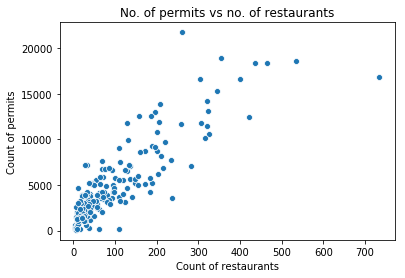

In [99]:
ax=sns.scatterplot(x="GRADE",y="Permit Status",data=df_zipcode_merge)
ax.set(xlabel='Count of restaurants',ylabel="Count of permits",title="No. of permits vs no. of restaurants")
plt.show

##### Create a linear model with predictor as count of  permits and predicted value as count of restaurants

In [100]:
X = sm.add_constant(df_zipcode_merge['Permit Status'])
y = df_zipcode_merge['GRADE']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  GRADE   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     564.5
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           6.17e-59
Time:                        14:49:09   Log-Likelihood:                -1050.9
No. Observations:                 193   AIC:                             2106.
Df Residuals:                     191   BIC:                             2112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -12.6782      6.123     -2.071

##### Null hypothese is coefficient of count of permits is zero. We get p-value= 0. Thus we can reject the null hypothesis at 0.05 level of significance. 

##### Thus we can say that there is a relationship between count of permits and count of restaurants(coffee shops and healthy food restaurants)

##### The count of permits in a neighbourhood can be used to predict if it is an affluent neighborhood or not since the count of restaurants is a proxy for gentrification.

#### 2.3 Hypothesis 3: Is there a linear relationship between no. of permits for major development activity and complaints received by Department of Buildings 

##### Read dataframe of complaints received by DOB

In [101]:
df_complaints=pd.read_csv("DOB_Complaints_Received.csv")

c:\users\karan\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### Create Date Entered Year column from Data Entered columns

In [102]:
df_complaints["Date Entered Year"] = df_complaints.apply(lambda row: getYear(row['Date Entered']),axis=1)

In [103]:
df_complaints["Date Entered Year"].unique()

array([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 2001, 1997,
       1998, 1999, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

##### The years match years recorded in permits dataframe

##### Find count of complaints by zip code

In [104]:
df_complaints2 = pd.DataFrame(df_complaints.groupby(["ZIP Code"]).count()["Complaint Category"]).reset_index()

##### Correct numerical entries in Zip code column in complaints dataframe.

In [105]:
def getZip(code):
    if isinstance(code,int):
        return code
    if isinstance(code,str):
        code=code.strip()
        if code.isdigit():
            return int(code)
        else:
            return np.nan
    return np.nan

In [106]:
df_complaints2['ZIP Code']=df_complaints2.apply(lambda row: getZip(row['ZIP Code']),axis=1)

##### Include only those permits that involve major development activity

In [107]:
df_major_work = df[df["Job Type"].isin(["NB","A1","DM"])]

##### Get count of permits by zip code

In [108]:
df_zipcode_work2 = pd.DataFrame(df_major_work.groupby(["Zip Code"]).count()['Permit Status']).reset_index()

##### Merge dataframe of count of complaints and count of permits by zip code

In [109]:
df_zipcode_merge5 = df_complaints2.join(df_zipcode_work2.set_index("Zip Code"),how="inner",on="ZIP Code")

<function matplotlib.pyplot.show(*args, **kw)>

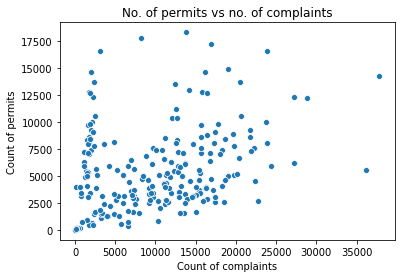

In [110]:
ax= sns.scatterplot(x="Complaint Category",y="Permit Status",data=df_zipcode_merge5)
ax.set(ylabel='Count of permits',xlabel="Count of complaints",title="No. of permits vs no. of complaints")
plt.show

##### Create linear model with predictor as count of permits and predicted value as count of complaints

In [111]:
X = sm.add_constant(df_zipcode_merge5['Permit Status'])
y = df_zipcode_merge5["Complaint Category"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Complaint Category   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     62.26
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           9.30e-14
Time:                        14:52:08   Log-Likelihood:                -2592.3
No. Observations:                 253   AIC:                             5189.
Df Residuals:                     251   BIC:                             5196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4730.0733    678.304      6.973

##### Null hypothese is coefficient of count of permits is zero. We get p-value= 0. Thus we can reject the null hypothesis at 0.05 level of significance. 

##### Thus there is a linear relationship between count of permits and count of complaints received by DOB

##### We can use no. of permits as a predictor of population, no. of restaurants(coffee shops and healthy food restaurants) and no. of compliants received by DOB.